In [1]:
# Dependencies and setup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Imputer
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from yellowbrick.regressor import ResidualsPlot
%matplotlib inline

In [2]:
# Set maximum rows to a high number
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 150)

In [3]:
# Load dataset
training_data = pd.read_csv("02-cleaned_data/cleaned_training.csv",index_col=0)

In [4]:
# Define a "TotLivingSF" variable that takes all the livable square feet in a home
training_data["TotLivingSF"] = training_data["GrLivArea"] + training_data["TotalBsmtSF"] - training_data["LowQualFinSF"]

# training_data["FullBath"] = training_data["FullBath"] + training_data["BsmtFullBath"]
# training_data["HalfBath"] = training_data["HalfBath"] + training_data["BsmtHalfBath"]
# Separate "YearBuilt" into multiple bins and define the separations as "YearBuiltBin"
year_bins = [0,1920,1940,1960,1980,2000,2020]
year_groups = ["pre_1920","1920_1940","1940_1960","1960_1980","1980_2000","2000_up"]
training_data["YearBuiltBin"] = pd.cut(training_data["YearBuilt"],year_bins,labels=year_groups)

In [5]:
# HERE
numerical_variables=training_data[["TotLivingSF","GrLivArea","LotFrontage","LotArea","TotalBsmtSF","SalePrice"]].copy()

In [6]:
# year_bins = [0,1920,1940,1960,1980,2000,2020]
# year_groups = ["pre_1920","1920_1940","1940_1960","1960_1980","1980_2000","2000_up"]
# training_data["YearBuiltBin"] = pd.cut(training_data["YearBuilt"],year_bins,labels=year_groups)

In [7]:
# HERE
training_data = training_data[["TotLivingSF","LotFrontage","LotArea","OverallQual","YearBuilt","ExterQual","GarageCars","CentralAir","YearRemodAdd","FullBath","OverallCond","KitchenQual","Fireplaces","FireplaceQu","MSZoning","Neighborhood","SalePrice"]]

In [8]:
# Separate x and y variables
# Matrix of independent variable (square feet data)
# X = np.log(training_data.loc[:,["GrLivArea"]].values)
X = training_data.iloc[:,:-1].values
# Vector of dependent variable (home sale price)
# y = np.log(training_data.iloc[:,-1].values)
y = np.log(training_data.iloc[:,-1]).values

In [9]:
training_data["ExterQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
# training_data["BsmtQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
training_data["KitchenQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
training_data["FireplaceQu"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
# training_data["GarageQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)

In [10]:
data = training_data.iloc[:,:-1]

In [11]:
data_encoded = pd.get_dummies(data,columns=["CentralAir","MSZoning","Neighborhood"],drop_first=True)
# data_encoded = pd.get_dummies(data,columns=["MSSubClass","Neighborhood","OverallQual","ExterQual","BsmtQual","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageType","GarageCars","GarageQual"])
data_encoded

TotLivingSF  LotFrontage  LotArea  OverallQual  YearBuilt  ExterQual  \
Id                                                                           
1            2566         65.0     8450            7       2003          4   
2            2524         80.0     9600            6       1976          3   
3            2706         68.0    11250            7       2001          4   
4            2473         60.0     9550            7       1915          3   
5            3343         84.0    14260            8       2000          4   
6            2158         85.0    14115            5       1993          3   
7            3380         75.0    10084            8       2004          4   
8            3197         80.0    10382            7       1973          3   
9            2726         51.0     6120            7       1931          3   
10           2068         50.0     7420            5       1939          3   
11           2080         70.0    11200            5       1965          3   
12           3499         85.0    11924            9       2005          5   
13           1824         71.0    12968            5       1962          3   
14           2988         91.0    10652            7       2006          4   
15           2506         73.0    10920            6       1960          3   
...           ...          ...      ...          ...        ...        ...   
1446         1727         70.0     8400            6       1966          3   
1447         2376         73.0    26142            5       1962          3   
1448         3310         80.0    10000            8       1995          4   
1449         1906         70.0    11767            4       1910          3   
1450         1260         21.0     1533            5       1970          3   
1451         2688         60.0     9000            5       1974          3   
1452         3151         78.0     9262            8       2008          4   
1453         1619         35.0     3675            5       2005          3   
1454         2280         90.0    17217            5       2006          3   
1455         2442         62.0     7500            7       2004          4   
1456         2600         62.0     7917            6       1999          3   
1457         3615         85.0    13175            6       1978          3   
1458         3492         66.0     9042            7       1941          5   
1459         2156         68.0     9717            5       1950          3   
1460         2512         75.0     9937            5       1965          4   

      GarageCars  YearRemodAdd  FullBath  OverallCond  KitchenQual  \
Id                                                                   
1              2          2003         2            5            4   
2              2          1976         2            8            3   
3              2          2002         2            5            4   
4              3          1970         1            5            4   
5              3          2000         2            5            4   
6              2          1995         1            5            3   
7              2          2005         2            5            4   
8              2          1973         2            6            3   
9              2          1950         2            5            3   
10             1          1950         1            6            3   
11             1          1965         1            5            3   
12             3          2006         3            5            5   
13             1          1962         1            6            3   
14             3          2007         2            5            4   
15             1          1960         1            5            3   
...          ...           ...       ...          ...          ...   
1446           1          1966         1            5            3   
1447           1          1962         1            7            3   
1448           2          1996 

In [12]:
X = data_encoded.values
data_encoded.head()

TotLivingSF  LotFrontage  LotArea  OverallQual  YearBuilt  ExterQual  \
Id                                                                         
1          2566         65.0     8450            7       2003          4   
2          2524         80.0     9600            6       1976          3   
3          2706         68.0    11250            7       2001          4   
4          2473         60.0     9550            7       1915          3   
5          3343         84.0    14260            8       2000          4   

    GarageCars  YearRemodAdd  FullBath  OverallCond  KitchenQual  Fireplaces  \
Id                                                                             
1            2          2003         2            5            4           0   
2            2          1976         2            8            3           1   
3            2          2002         2            5            4           1   
4            3          1970         1            5            4           1   
5            3          2000         2            5            4           1   

    FireplaceQu  CentralAir_Y  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
Id                                                                     
1             0             1            0            0            1   
2             3             1            0            0            1   
3             3             1            0            0            1   
4             4             1            0            0            1   
5             3             1            0            0            1   

    MSZoning_RM  Neighborhood_Blueste  Neighborhood_BrDale  \
Id                                                           
1             0                     0                    0   
2             0                     0                    0   
3             0                     0                    0   
4             0                     0                    0   
5             0                     0                    0   

    Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
Id                                                                     
1                      0                     0                     1   
2                      0                     0                     0   
3                      0                     0                     1   
4                      0                     0                     0   
5                      0                     0                     0   

    Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
Id                                                                     
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      1                     0                     0   
5                      0                     0                     0   

    Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
Id                                                                    
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   
5                     0                     0                     0   

    Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
Id                                                                  
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   
5                    0                     0    

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 0)

In [14]:
model = RandomForestRegressor(n_estimators = 600, n_jobs=-1, oob_score=True,min_samples_leaf = 2, max_features = 0.5)

In [15]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [16]:
model.score(X_test, y_test)

0.8869093880878448

In [17]:
y_pred = model.predict(X_test)

In [18]:

# RANDOM FOREST
# Training Score: 0.9676209607593179
# Testing Score: 0.8826237860696731
# MSE: 0.017770740230213352


# OTHER MODEL
# Training Score: 0.9664100221561759
# Testing Score: 0.8879678247068292
# MSE: 0.016961653625515972

Training Score: 0.9664413141219022
Testing Score: 0.8869093880878449
MSE: 0.017473758791469157


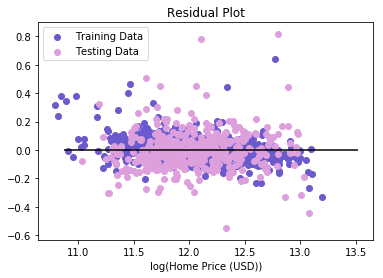

In [19]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
MSE = mean_squared_error(y_test,y_pred)
### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(f"MSE: {MSE}")
### BEGIN SOLUTION
# predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="slateblue", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, c="plum", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.xlabel("log(Home Price (USD))")
plt.show()
### END SOLUTION

In [20]:
# Load dataset
testing_data = pd.read_csv("02-cleaned_data/cleaned_testing.csv",index_col=0)

In [21]:
# Define a "TotLivingSF" variable that takes all the livable square feet in a home
testing_data["TotLivingSF"] = testing_data["GrLivArea"] + testing_data["TotalBsmtSF"] - testing_data["LowQualFinSF"]

# training_data["FullBath"] = training_data["FullBath"] + training_data["BsmtFullBath"]
# training_data["HalfBath"] = training_data["HalfBath"] + training_data["BsmtHalfBath"]
# Separate "YearBuilt" into multiple bins and define the separations as "YearBuiltBin"
year_bins = [0,1920,1940,1960,1980,2000,2020]
year_groups = ["pre_1920","1920_1940","1940_1960","1960_1980","1980_2000","2000_up"]
testing_data["YearBuiltBin"] = pd.cut(testing_data["YearBuilt"],year_bins,labels=year_groups)

In [22]:
testing_data = testing_data[["TotLivingSF","LotFrontage","LotArea","OverallQual","YearBuilt","ExterQual","GarageCars","CentralAir","YearRemodAdd","FullBath","OverallCond","KitchenQual","Fireplaces","FireplaceQu","MSZoning","Neighborhood"]]

In [23]:
testing_data["ExterQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
# training_data["BsmtQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
testing_data["KitchenQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
testing_data["FireplaceQu"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
# training_data["GarageQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)

In [24]:
data_encoded_testing = pd.get_dummies(testing_data,columns=["CentralAir","MSZoning","Neighborhood"],drop_first=True)

In [25]:
X_testing_values = data_encoded_testing.values

In [26]:
y_pred_testing = model.predict(X_testing_values)

In [27]:
y_pred_testing

array([11.75154313, 12.00976856, 12.07242792, ..., 12.0022718 ,
       11.61467503, 12.23026246])

In [28]:
testing_data["SalePrice"] = y_pred_testing

In [29]:
testing_data["SalePrice"] = y_pred_testing

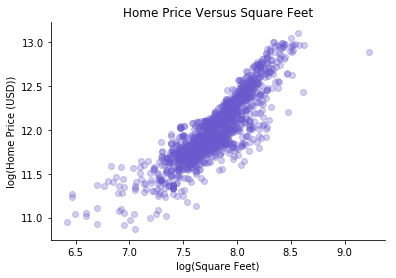

In [30]:
# Show a scatter plot compaing home price and home square feet
plt.scatter(np.log(testing_data['TotLivingSF']),testing_data['SalePrice'],color="slateblue",alpha=0.3)
plt.title("Home Price Versus Square Feet")
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()

In [31]:
testing_data['SalePrice'] = np.exp(testing_data['SalePrice'])

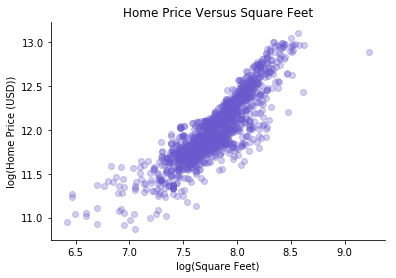

In [32]:
# Show a scatter plot compaing home price and home square feet
plt.scatter(np.log(testing_data['TotLivingSF']),np.log(testing_data['SalePrice']),color="slateblue",alpha=0.3)
plt.title("Home Price Versus Square Feet")
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()

In [33]:
kaggle_output = testing_data["SalePrice"]

In [34]:
kaggle_output.to_csv("03-kaggle_submission/random_forest_solution.csv",header=True)

## Gradient Boosting Regressor

In [35]:
GBR = GradientBoostingRegressor(n_estimators = 100)
# , max_depth = 4

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 0)

In [37]:
GBR.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [38]:
y_pred = GBR.predict(X_test)

In [39]:
GBR.score(X_test, y_test)

0.887190584058621

Training Score: 0.9439871682737495
Testing Score: 0.887190584058621
MSE: 0.017430310882899234


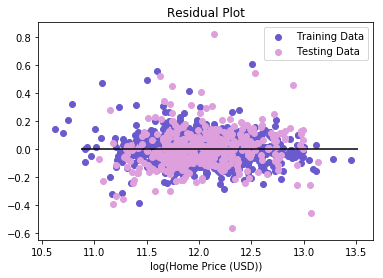

In [40]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
training_score = GBR.score(X_train, y_train)
testing_score = GBR.score(X_test, y_test)
MSE = mean_squared_error(y_test,y_pred)
### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(f"MSE: {MSE}")
### BEGIN SOLUTION
# predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(GBR.predict(X_train), GBR.predict(X_train) - y_train, c="slateblue", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, c="plum", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.xlabel("log(Home Price (USD))")
plt.show()
### END SOLUTION

In [41]:
# Load dataset
testing_data = pd.read_csv("02-cleaned_data/cleaned_testing.csv",index_col=0)

In [42]:
# Define a "TotLivingSF" variable that takes all the livable square feet in a home
testing_data["TotLivingSF"] = testing_data["GrLivArea"] + testing_data["TotalBsmtSF"] - testing_data["LowQualFinSF"]

# training_data["FullBath"] = training_data["FullBath"] + training_data["BsmtFullBath"]
# training_data["HalfBath"] = training_data["HalfBath"] + training_data["BsmtHalfBath"]
# Separate "YearBuilt" into multiple bins and define the separations as "YearBuiltBin"
year_bins = [0,1920,1940,1960,1980,2000,2020]
year_groups = ["pre_1920","1920_1940","1940_1960","1960_1980","1980_2000","2000_up"]
testing_data["YearBuiltBin"] = pd.cut(testing_data["YearBuilt"],year_bins,labels=year_groups)

In [43]:
testing_data = testing_data[["TotLivingSF","LotFrontage","LotArea","OverallQual","YearBuilt","ExterQual","GarageCars","CentralAir","YearRemodAdd","FullBath","OverallCond","KitchenQual","Fireplaces","FireplaceQu","MSZoning","Neighborhood"]]

In [44]:
testing_data["ExterQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
# training_data["BsmtQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
testing_data["KitchenQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
testing_data["FireplaceQu"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
# training_data["GarageQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)

In [45]:
data_encoded_testing = pd.get_dummies(testing_data,columns=["CentralAir","MSZoning","Neighborhood"],drop_first=True)

In [46]:
X_testing_values = data_encoded_testing.values

In [47]:
y_pred_testing = GBR.predict(X_testing_values)

In [48]:
testing_data["SalePrice"] = y_pred_testing

In [49]:
testing_data['SalePrice'] = np.exp(testing_data['SalePrice'])

In [50]:
kaggle_output = testing_data["SalePrice"]

In [51]:
kaggle_output.to_csv("03-kaggle_submission/GBR_solution.csv",header=True)